<a href="https://colab.research.google.com/github/GoPlusUltra/Health-Insurance-decisioning-classification-model/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

 ## **Attribute Information** 

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [164]:
import pandas as pd                #Importing basic libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [165]:
from google.colab import drive   #Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
df=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')     #Path of dataset

In [167]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [169]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [170]:
df.duplicated().value_counts()

False    381109
dtype: int64

There are **no duplicate rows** in our dataframe

In [171]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

As id column has all unique values its not useful for either data anlysis or buliding an ML algorithm that's why we are dropping it.

In [172]:
df=df.drop('id',axis=1)

In [173]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Our dataset dont have any NaN values, that's great!!

We will do EDA on our dataset.

## **EDA**

Lets Create a list of categorical column names and use for loop for getting Count_Plot for this column datasets.

To know, how this counts are w.r.t our target variable 'Response', we are taking Response as a Hue. 

In [174]:
cat_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']

           Ratio   Count
Male    54.07613  206089
Female  45.92387  175020
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


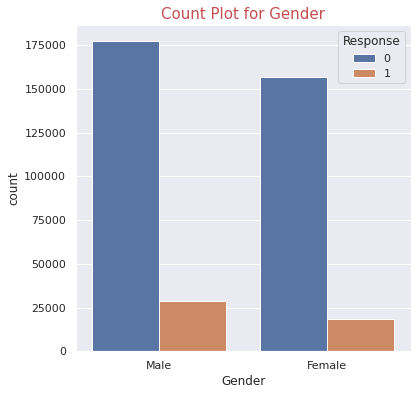

________________________________________________________________________________
       Ratio   Count
1  99.786938  380297
0   0.213062     812
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


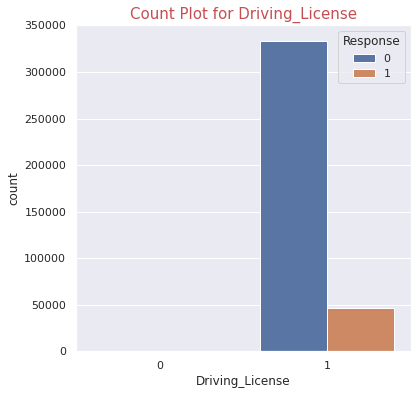

________________________________________________________________________________
       Ratio   Count
0  54.178988  206481
1  45.821012  174628
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


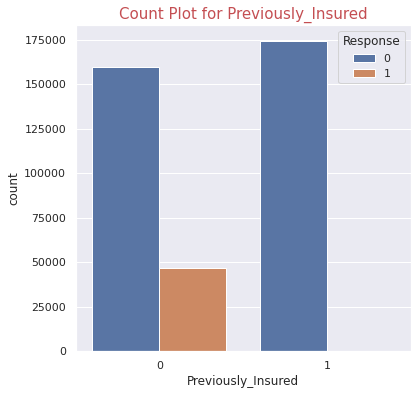

________________________________________________________________________________
               Ratio   Count
1-2 Year   52.561341  200316
< 1 Year   43.238549  164786
> 2 Years   4.200111   16007
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


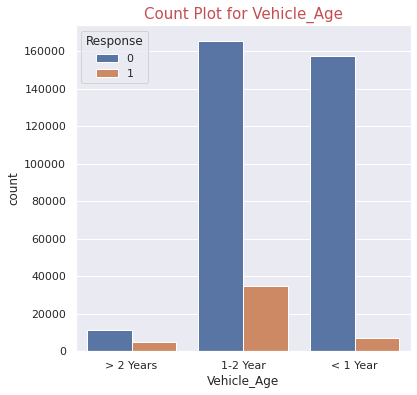

________________________________________________________________________________
         Ratio   Count
Yes  50.487656  192413
No   49.512344  188696
------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


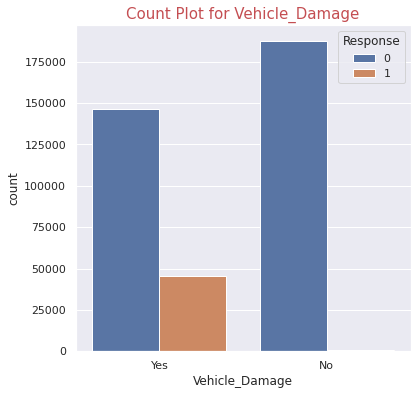

________________________________________________________________________________


In [175]:
for i in cat_columns:
  print(pd.DataFrame({'Ratio':df[i].value_counts()*100/len(df),'Count':df[i].value_counts()}))
  print(f'-'*60)
  plt.figure(figsize=(6,6))
  plt.title(f'Count Plot for {i}',color='r',fontsize=15)
  sns.countplot(i,hue='Response',data=df)
  plt.show()
  print(f'_'*80)

**Insights**



*   **Count plot for Gender**

    1. Both the genders have almost similar contribution in our dataset.

    2. Also, the ratio of Response No to Response Yes is almost similar for both the genders.
*   **Count plot for Driving License**

    1. 99.8 percent of customers have Driving License

    2. We can consider to drop this column for building classification model.
     As Minority class has very less contribution to our feature.
*   **Count plot for Previously Insured Customers.**
    1. Customers who has already Insured their Vehicle will not be interested for Insurance. That's what we were expecting and the data shows the same.
    2. From remaining 55 % of Customers, almost 25% Customers are interested for getting Vehicle Insurance.


*   **Count plot for Vehicle Age**
    1. The most of the observations of dataset have vehicle age less than 2 years. Vehicles having age more than 2 years contributes only 5%.
    2. Getting Response as a 'Yes' for insurance is more in '1-2 years vehicle age' class.

*   **Count plot for Vehicle Damage**
   1. Both the Vehicle Damage classes have similar number of observations.
   2. Almost 25% customers  who has faced the vehicle damage before are ready for getting vehicle insurance. We can consider they have the knowledge of expenditure require after vehicle damage.
   3. On the other hand almost No customers are interested for Insurance who hasn't faced the Vehicle Damage.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


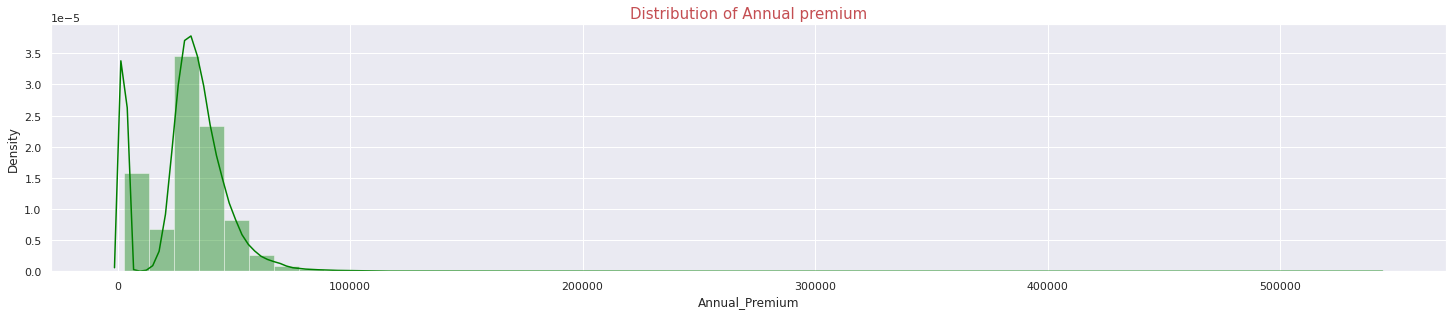

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


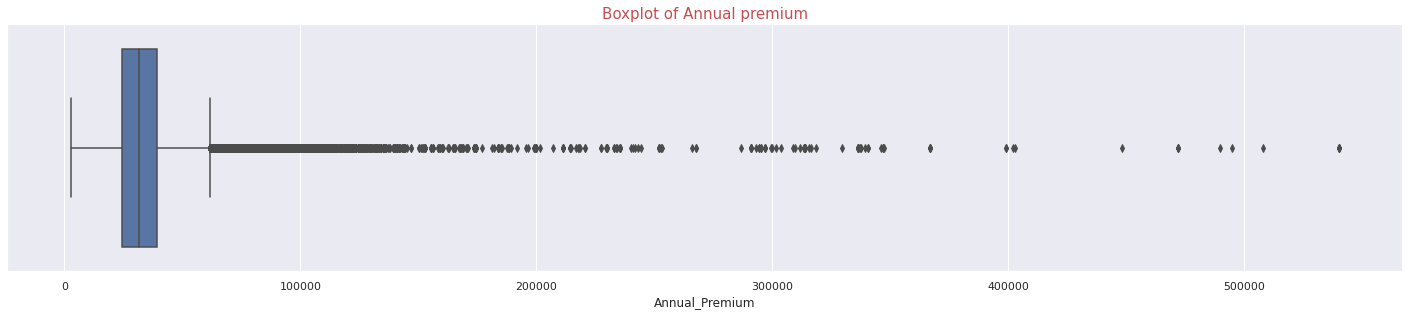

In [176]:

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium",color='r',fontsize=15)
plt.show()
plt.figure(figsize=(25,10))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("Boxplot of Annual premium",color='r',fontsize=15)
plt.show()

**Insights**


The distribution for Annual Premium is Right skewed.

There are many outliers in this dataset feature. First we will run our model without removing them and if we are getting good results then no need to remove  the outiers.

Text(0.5, 1.0, 'Age wise Count Plot')

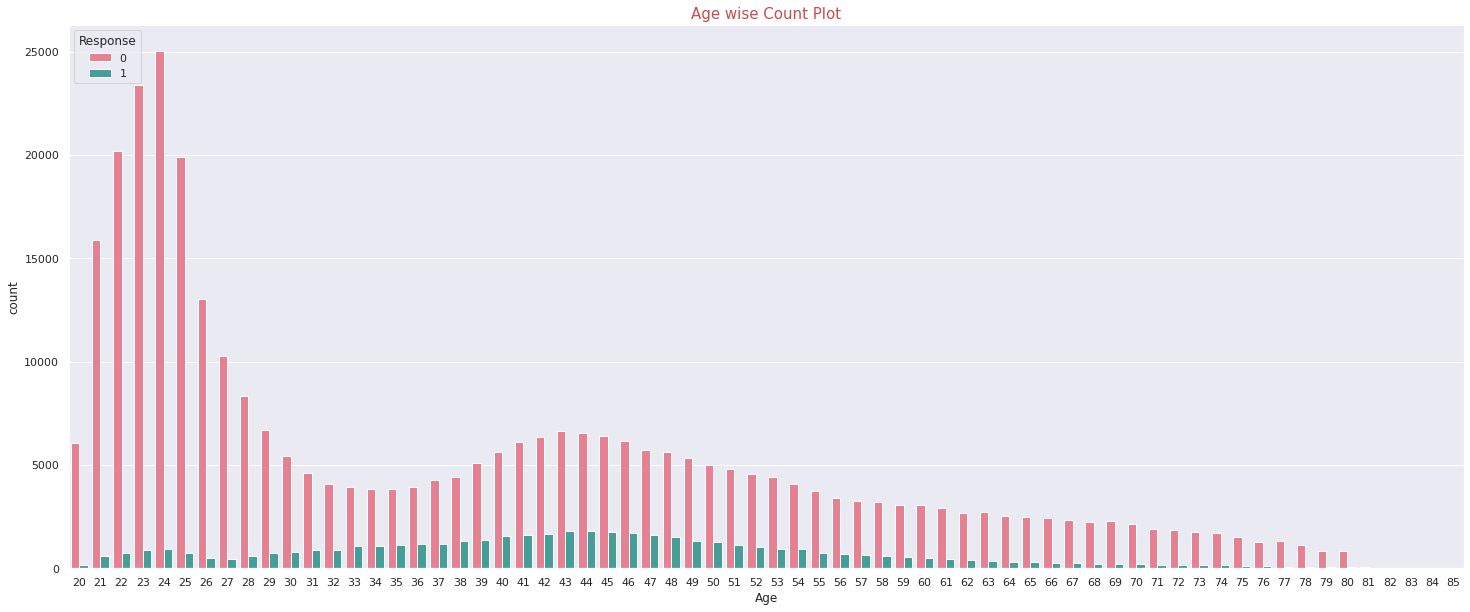

In [177]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',hue='Response',data=df,palette="husl")
plt.title('Age wise Count Plot',color='r',fontsize=15)

**Insights**


As we can see many observations are from youngsters.

Their Response for Vehicle Insurance is almost NO. Lack of Maturity, Money or Finantial Education might be the reason.

Let's find wheather they already have Vehicle Insuarance or not.

Text(0.5, 1.0, 'Previously Insured People by Age')

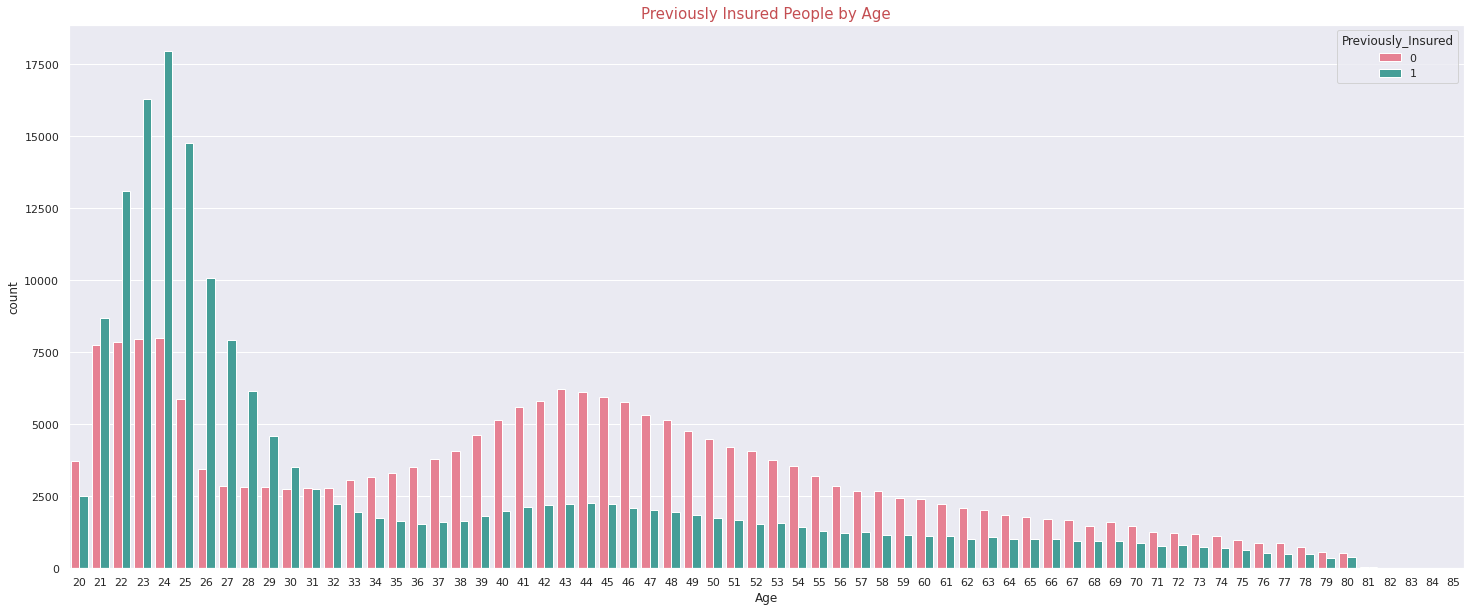

In [178]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',hue='Previously_Insured',data=df,palette="husl")
plt.title('Previously Insured People by Age',color='r',fontsize=15)

**Insights**


Clearly our previous conclusions were wrong.

Many Youngsters already have the Vehicle Insurance.

Text(0.5, 1.0, 'Region Code Count Plot ')

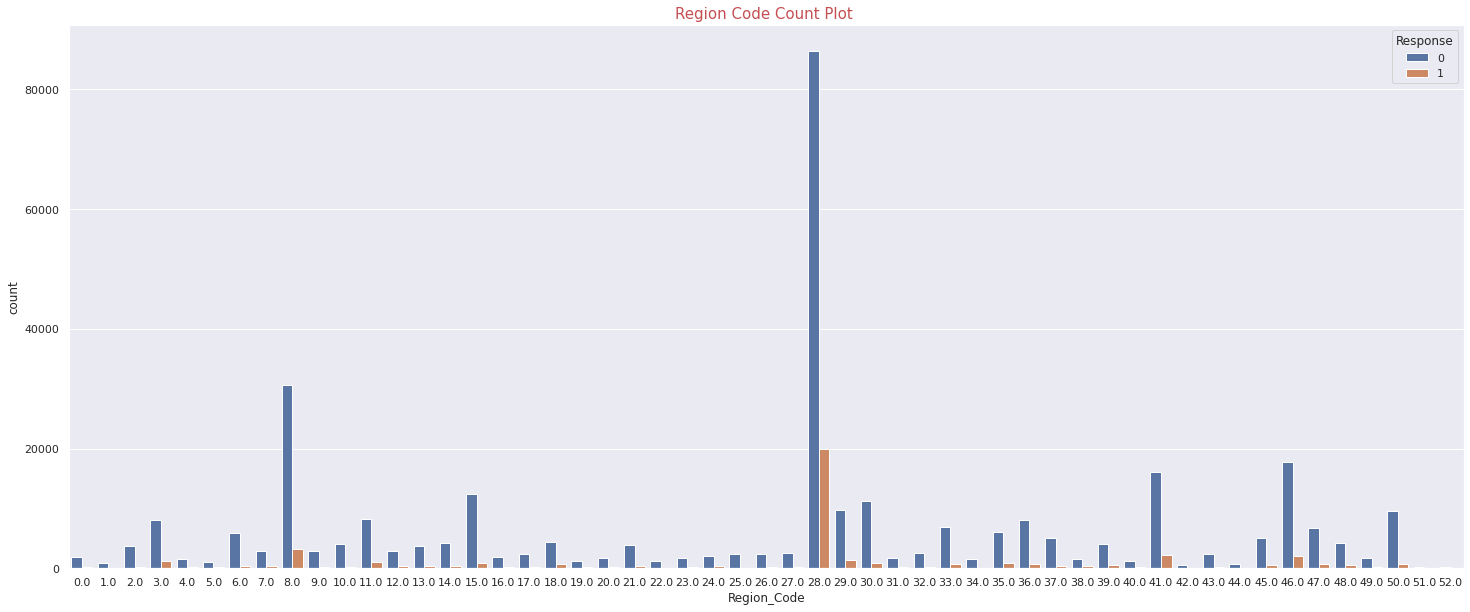

In [179]:
plt.figure(figsize=(25,10))
sns.countplot(x='Region_Code',hue='Response',data=df,palette="deep")
plt.title('Region Code Count Plot ',color='r',fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


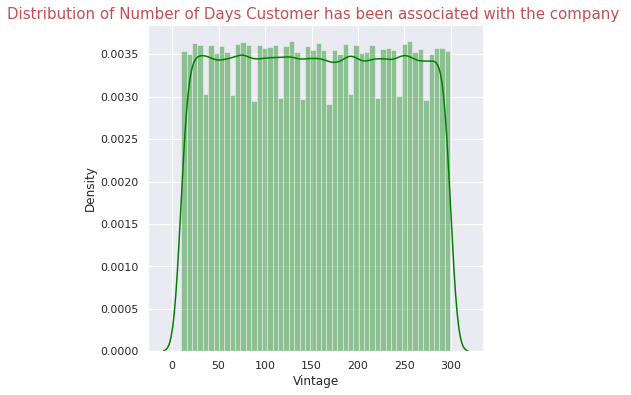

In [180]:
plt.figure(figsize=(6,6))
sns.distplot(df['Vintage'], color='green')
plt.title("Distribution of Number of Days Customer has been associated with the company ",color='r',fontsize=15)
plt.show()

       Ratio   Count
0  87.743664  334399
1  12.256336   46710


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


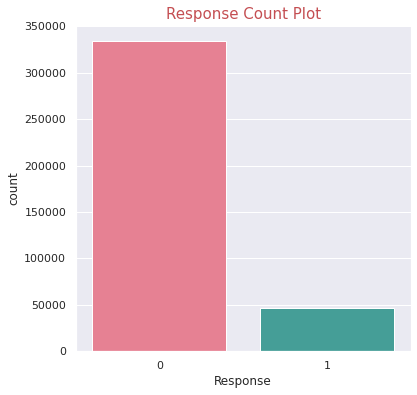

In [181]:
plt.figure(figsize=(6,6))
sns.countplot(df.Response,palette="husl")
plt.title('Response Count Plot',color='r',fontsize=15)
print(pd.DataFrame({'Ratio':df['Response'].value_counts()*100/len(df),'Count':df['Response'].value_counts()}))


**Insights**


87.75% of Customers don't want the Vehicle Insurance.

As some customers already has Vehicle Insurance.  We will neglect those counts and find the total percent of people interested for Vehicle Insurance. That will be the True Percentage .

In [182]:
print('Percentage of customers who didnt have the Vehicle Insurance and show Response as a YES :',round((((df['Response']==1).sum()/(len(df)-(df['Previously_Insured']==1).sum())*100)),2))

Percentage of customers who didnt have the Vehicle Insurance and show Response as a YES : 22.62


**Percentage of customers who didnt have the Vehicle Insurance and show Response as a YES is 22.62 %**

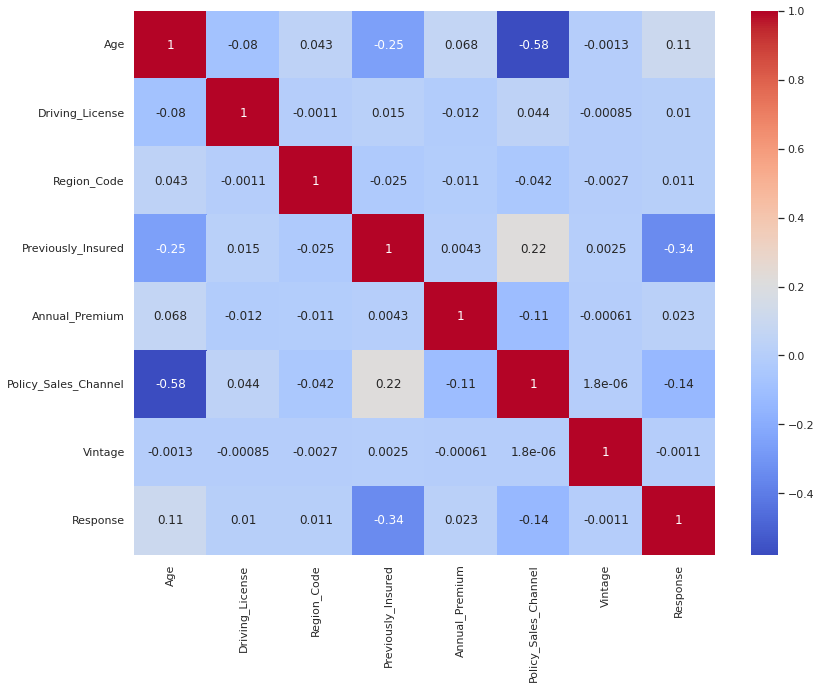

In [183]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## **Data Preparation**

In [184]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()

In [185]:
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage']=label_encoder.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age']=label_encoder.fit_transform(df['Vehicle_Age'])

In [186]:
df.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0


In [187]:
X=df.drop('Response',axis=1)
y=df['Response']

In [188]:
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,0,0,33536.0,26.0,183


In [189]:
y.head(2)

0    1
1    0
Name: Response, dtype: int64

### Finding Feature Importance by using ExtraTreesClassifier

In [190]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_classifier = ExtraTreesClassifier()

In [191]:
extra_tree_classifier.fit(X,y)

ExtraTreesClassifier()

In [192]:
feature_importance=extra_tree_classifier.feature_importances_

In [193]:
feature_importance

array([0.00460674, 0.14975601, 0.000484  , 0.10587787, 0.05178173,
       0.01560223, 0.07912562, 0.24634737, 0.06976737, 0.27665106])

In [194]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_classifier.estimators_],
                                        axis = 0)

In [195]:
feature_importance_normalized

array([2.28051702e-03, 1.96775569e-02, 8.66026073e-05, 1.68929571e-02,
       4.41913651e-02, 9.45800584e-03, 4.57856301e-02, 6.42335176e-03,
       1.06623490e-02, 9.89293265e-03])

Text(0.5, 1.0, 'Feature Importance')

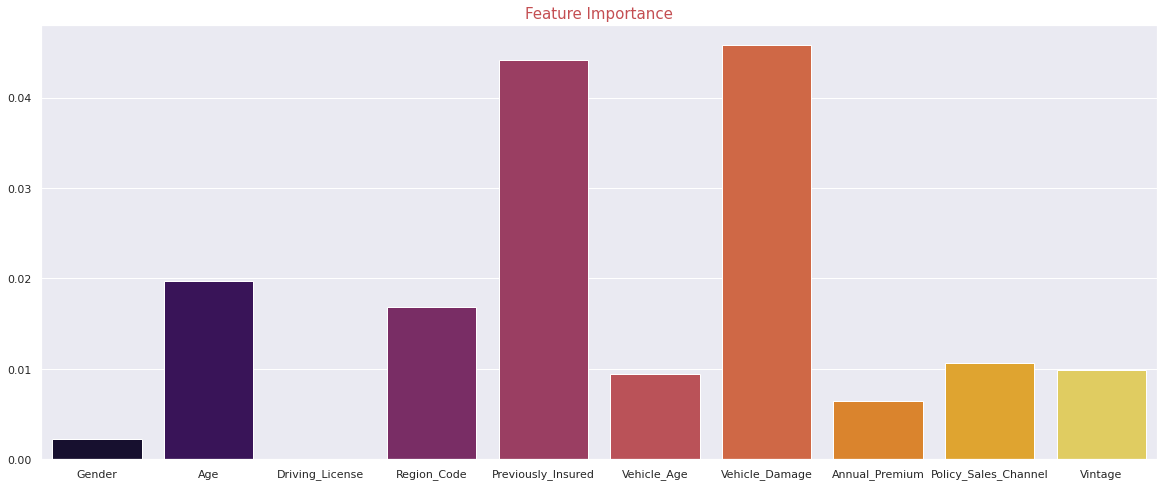

In [196]:
plt.figure(figsize=(20,8))
sns.barplot(x=X.columns,y=feature_importance_normalized,palette='inferno')
plt.title('Feature Importance',color='r', fontsize=15)

As Gender and Driving_Licence are hardly making impact on our target variable Resonse. Hence we can drop them.

In [197]:
X.drop(labels=['Gender','Driving_License'],axis=1,inplace=True)

In [198]:
X.head(2)

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,0,2,1,40454.0,26.0,217
1,76,3.0,0,0,0,33536.0,26.0,183


### Train_Test_Split

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=52)

In [201]:
print(X_train.shape)
print(X_test.shape)

(304887, 8)
(76222, 8)


### Feature Scaling 

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [203]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [204]:
X_train

array([[0.06153846, 0.40384615, 1.        , ..., 0.07296827, 0.93209877,
        0.52941176],
       [0.89230769, 0.69230769, 1.        , ..., 0.        , 0.15432099,
        0.00346021],
       [0.41538462, 0.59615385, 0.        , ..., 0.        , 0.75925926,
        0.4083045 ],
       ...,
       [0.32307692, 0.53846154, 0.        , ..., 0.        , 0.07407407,
        0.06228374],
       [0.43076923, 0.13461538, 0.        , ..., 0.09159404, 0.75925926,
        0.98269896],
       [0.06153846, 0.34615385, 1.        , ..., 0.05339187, 0.93209877,
        0.06228374]])

Now we are ready to start fitting our models and see which one gives the best results.

We will start with most classic model for classification **Logistic Regression**.

## **Model Selection**

###As the Target Variable has only two classes(Yes or No), We can identify the problem as a **Binary Classification.**

###We will develop 4 models and whichever will give the best Results we will use it for the deployment. At the end we will compare the Evaluation Metrics of these 4 models. This 4 models we are going to develop:-

### 1.Logistic Regression

###2.Random Forest Classifier

###3.XGB Classifier

###4.Decision Tree Classifier

### Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [206]:
log_reg=log_reg.fit(X_train,y_train)

In [207]:
log_reg.score(X_train,y_train)

0.8775415153811084

In [208]:
y_pred_test=log_reg.predict(X_test)

In [209]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
log_reg_prob =log_reg.predict_proba(X_test)[:,1]

In [211]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [212]:
acc_lr=accuracy_score(y_test,y_pred_test)
recall_lr=recall_score(y_test,y_pred_test)
precision_lr=precision_score(y_test,y_pred_test)
f1score_lr=f1_score(y_test,y_pred_test)
#AUC_LR=roc_auc_score(y_pred_test,y_test)

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(y_test,y_pred_test) , 3))
print("Precision:" , round(precision_score(y_test,y_pred_test) , 3))
print("Recall:" , round(recall_score(y_test,y_pred_test), 3))
print("F1-Score:" , round(f1_score(y_test,y_pred_test) , 3))
#print("ROC_AUC Score:" , round(AUC_LR , 3))

Accuracy :  0.877
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
from collections import Counter

In [214]:
print('The true values of test set are ', Counter(y_test==0))
print('The predicted values of test set are ', Counter(y_pred_test==0))

The true values of test set are  Counter({True: 66848, False: 9374})
The predicted values of test set are  Counter({True: 76222})


Our model is predicting all Response value as a 0 .

This happened because of the imbalance in the data. The Target Variable has 'class 1' as a minority. 

The training model is overfitting the data. As the class 1 is in minority model is not giving importance to that class. 

We can balance the dataset using resampling technique.

### Using the RandomOverSample to Balance the Dataset.

In [215]:
X.head(2)

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,0,2,1,40454.0,26.0,217
1,76,3.0,0,0,0,33536.0,26.0,183


In [216]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

*Oversampling methods duplicate or create new synthetic examples in the minority class.*

In [217]:
from imblearn.over_sampling import RandomOverSampler
randomsampler=RandomOverSampler(random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Original dataset shape  Counter({0: 334399, 1: 46710})
Resampled dataset shape  Counter({1: 334399, 0: 334399})


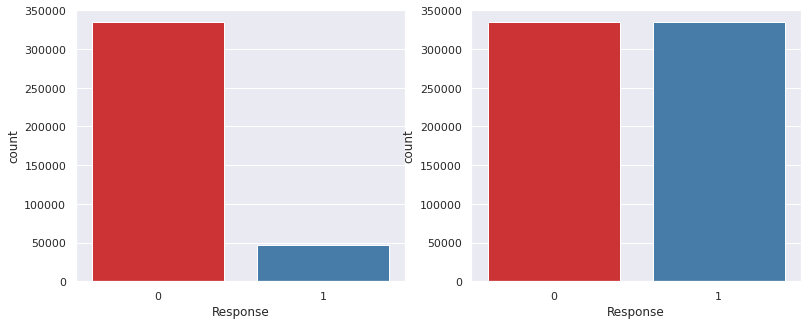

In [218]:
X_samp,y_samp=randomsampler.fit_resample(X,y)

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(y,palette='Set1')

plt.subplot(1,2,2)
sns.countplot(y_samp,palette='Set1')

print('Original dataset shape ',Counter(y))
print('Resampled dataset shape ',Counter(y_samp))

Splitting Resampled Dataset using Train_Test_Split in 80:20 Ratio. 

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp,test_size=0.2,random_state=52)
print('Train set shape',X_train.shape)
print('Test set shape',X_test.shape)

Train set shape (535038, 8)
Test set shape (133760, 8)


***Feature Scaling`***

In [220]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 1. Fitting Logistic Regression Model with Resampled Dataset.

In [221]:
log_reg=log_reg.fit(X_train,y_train)

y_pred_train=log_reg.predict(X_train)

y_pred_test=log_reg.predict(X_test)

log_reg_prob =log_reg.predict_proba(X_test)[:,1]

In [222]:
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test)
precision=precision_score(y_test,y_pred_test)
F1_score_=f1_score(y_test,y_pred_test)
ROC_AUC=roc_auc_score(y_pred_test,y_test)

#Evaluation Metrics
print("LR Precision with random over sampling :" , round(precision , 3))
print("LR Recall with random over sampling :" , round(recall, 3))
print("LR F1-Score with random over sampling :" , round(F1_score_, 3))
print("LR ROC_AUC Score with random over sampling :" , round(ROC_AUC , 3))

LR Precision with random over sampling : 0.705
LR Recall with random over sampling : 0.977
LR F1-Score with random over sampling : 0.819
LR ROC_AUC Score with random over sampling : 0.833


In [223]:
print("Training Accuracy with random over sampling : ", round(accuracy_score(y_train,y_pred_train) ,3))
print("Testing Accuracy with random over sampling : ", round(accuracy_score(y_test,y_pred_test) ,3))

Training Accuracy with random over sampling :  0.784
Testing Accuracy with random over sampling :  0.784


In [224]:
# storing the metrics value in a dataframe for later comparison
Model_metrics_dict={'Classifier Model':'Logistic Regression',
       'Training Accuracy':round(accuracy_score(y_train,y_pred_train),3),
       'Testing Accuracy':round(accuracy_score(y_test,y_pred_test),3),
       'Recall':round((recall),3),
       'F1_Score':round((F1_score_ ),3),
       'Precision':round(precision,3),
       'ROC_AUC Score':round((ROC_AUC ),3)
       }
Model_metrics_df=pd.DataFrame(Model_metrics_dict,index=[1])

In [225]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66949
           1       0.70      0.98      0.82     66811

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760



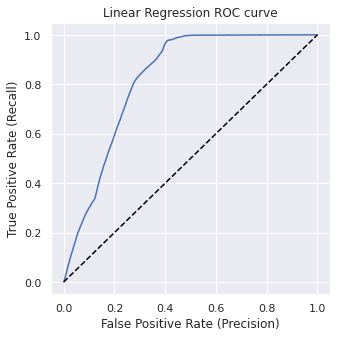

In [226]:
from sklearn.metrics import roc_curve
LR_FPR, LR_TPR, _ = roc_curve(y_test, log_reg_prob)

plt.figure(figsize=(5,5))
plt.title('Linear Regression ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')

plt.plot(LR_FPR,LR_TPR)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [227]:
def Confusion_matrix(y_train,y_test,y_pred_train,y_pred_test):
  '''
  This function will return Confusion Matrix for both train and test sets
  '''
  cm = confusion_matrix(y_train, y_pred_train)
  print('Train Set Confusion Matrix Values','\n',cm)
  plt.figure(figsize = (13,5))
  plt.subplot(1,2,1)
  plt.title('Train Set Confusion Matrix',color='r',fontsize=15)
  sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')


  cm = confusion_matrix(y_test, y_pred_test)
  print('Test Set Confusion Matrix Values','\n',cm)
  plt.subplot(1,2,2)
  plt.title('Test Set Confusion Matrix',color='r',fontsize=15)
  sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')

Train Set Confusion Matrix Values 
 [[157971 109479]
 [  6032 261556]]
Test Set Confusion Matrix Values 
 [[39579 27370]
 [ 1550 65261]]


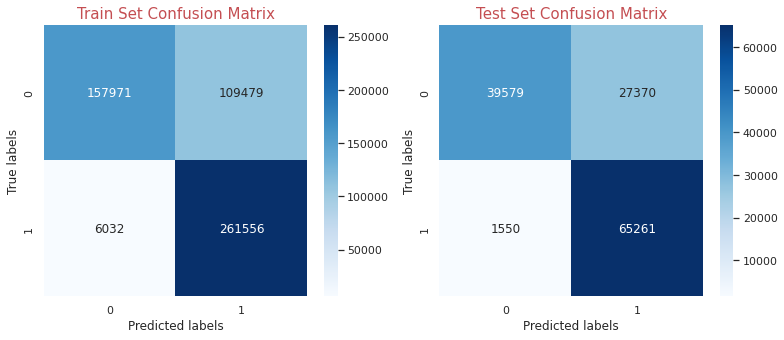

In [228]:
Confusion_matrix(y_train,y_test,y_pred_train,y_pred_test)

### 2. Random Forest Classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()

In [ ]:
rf_classifier=rf_classifier.fit(X_train,y_train)

y_pred_train=rf_classifier.predict(X_train)

y_pred_test=rf_classifier.predict(X_test)

rf_classifier_prob =rf_classifier.predict_proba(X_test)[:,1]

In [231]:
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test)
precision=precision_score(y_test,y_pred_test)
F1_score_=f1_score(y_test,y_pred_test)
ROC_AUC=roc_auc_score(y_pred_test,y_test)

#Evaluation Metrics
print("Random Forest Clasifier Precision:" , round(precision , 3))
print("Random Forest Clasifier Recall:" , round(recall, 3))
print("Random Forest Clasifier F1_score :" , round(F1_score_, 3))
print("Random Forest Clasifier ROC_AUC Score:" , round(ROC_AUC , 3))

Random Forest Clasifier Precision: 0.907
Random Forest Clasifier Recall: 0.998
Random Forest Clasifier F1_score : 0.95
Random Forest Clasifier ROC_AUC Score: 0.952


In [232]:
print("Random Forest Clasifier Training Accuracy : ", round(accuracy_score(y_train,y_pred_train) ,3))
print("Random Forest Clasifier Testing Accuracy: ", round(accuracy_score(y_test,y_pred_test) ,3))

Random Forest Clasifier Training Accuracy :  1.0
Random Forest Clasifier Testing Accuracy:  0.948


In [233]:
# storing the metrics value in a dataframe for later comparison
Model_metrics_dict={'Classifier Model':'Random Forest',
       'Training Accuracy':round(accuracy_score(y_train,y_pred_train),3),
       'Testing Accuracy':round(accuracy_score(y_test,y_pred_test),3),
       'Recall':round((recall),3),
       'Precision':round(precision,3),
       'F1_Score':round((F1_score_ ),3),
       'ROC_AUC Score':round((ROC_AUC ),3)
       }
Model_metrics_df=Model_metrics_df.append(Model_metrics_dict, ignore_index=True)

In [234]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     66949
           1       0.91      1.00      0.95     66811

    accuracy                           0.95    133760
   macro avg       0.95      0.95      0.95    133760
weighted avg       0.95      0.95      0.95    133760



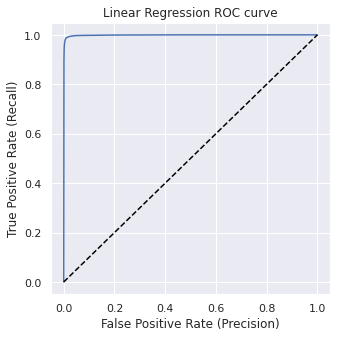

In [235]:
LR_FPR, LR_TPR, _ = roc_curve(y_test, rf_classifier_prob)

plt.figure(figsize=(5,5))
plt.title('Linear Regression ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')

plt.plot(LR_FPR,LR_TPR)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Train Set Confusion Matrix Values 
 [[267348    102]
 [     0 267588]]
Test Set Confusion Matrix Values 
 [[60095  6854]
 [  132 66679]]


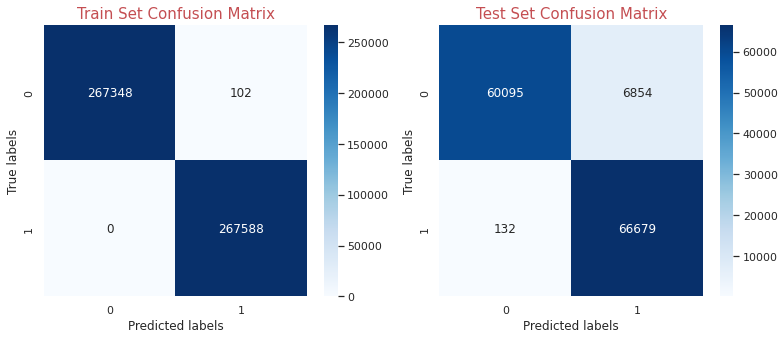

In [236]:
Confusion_matrix(y_train,y_test,y_pred_train,y_pred_test)

### 3. XGB Classifier

In [237]:
from xgboost import XGBClassifier
XGB=XGBClassifier()

In [238]:
XGB_Classifier=XGB.fit(X_train,y_train)

y_pred_train=XGB_Classifier.predict(X_train)

y_pred_test=XGB_Classifier.predict(X_test)

XGB_classifier_prob =XGB_Classifier.predict_proba(X_test)[:,1]

In [239]:
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test)
precision=precision_score(y_test,y_pred_test)
F1_score_=f1_score(y_test,y_pred_test)
ROC_AUC=roc_auc_score(y_pred_test,y_test)

#Evaluation Metrics
print("XGB Clasifier Precision:" , round(precision , 3))
print("XGB Recall:" , round(recall, 3))
print("XGB F1_score :" , round(F1_score_, 3))
print("XGB ROC_AUC Score:" , round(ROC_AUC , 3))

XGB Clasifier Precision: 0.734
XGB Recall: 0.927
XGB F1_score : 0.819
XGB ROC_AUC Score: 0.818


In [240]:
print("XGB Clasifier Training Accuracy : ", round(accuracy_score(y_train,y_pred_train) ,3))
print("XGB Clasifier Testing Accuracy: ", round(accuracy_score(y_test,y_pred_test) ,3))

XGB Clasifier Training Accuracy :  0.798
XGB Clasifier Testing Accuracy:  0.796


In [241]:
# storing the metrics value in a dataframe for later comparison
Model_metrics_dict={'Classifier Model':'XGB',
       'Training Accuracy':round(accuracy_score(y_train,y_pred_train),3),
       'Testing Accuracy':round(accuracy_score(y_test,y_pred_test),3),
       'Recall':round((recall),3),
       'Precision':round(precision,3),
       'F1_Score':round((F1_score_),3),
       'ROC_AUC Score':round((ROC_AUC ),3)
       }
Model_metrics_df=Model_metrics_df.append(Model_metrics_dict,ignore_index=True)

In [242]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.90      0.67      0.77     66949
           1       0.73      0.93      0.82     66811

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.79    133760
weighted avg       0.82      0.80      0.79    133760



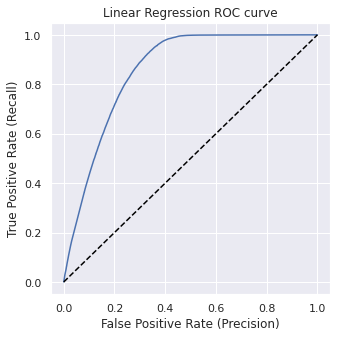

In [243]:
LR_FPR, LR_TPR, _ = roc_curve(y_test, XGB_classifier_prob)

plt.figure(figsize=(5,5))
plt.title('Linear Regression ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')

plt.plot(LR_FPR,LR_TPR)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Train Set Confusion Matrix Values 
 [[178241  89209]
 [ 18943 248645]]
Test Set Confusion Matrix Values 
 [[44544 22405]
 [ 4887 61924]]


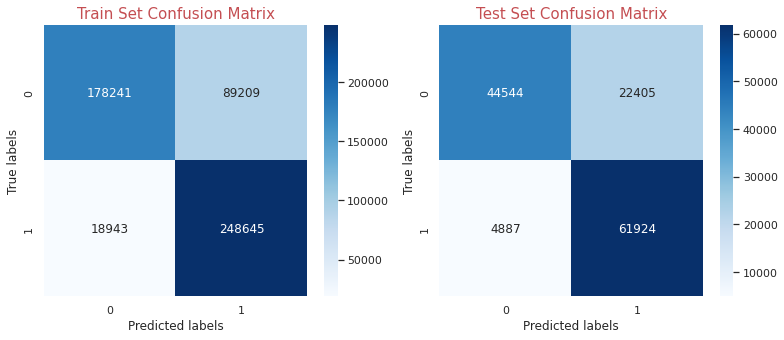

In [244]:
Confusion_matrix(y_train,y_test,y_pred_train,y_pred_test)

### 4. Decision Tree Classifier

In [245]:
from sklearn.tree import DecisionTreeClassifier
dicision_tree_classifier=DecisionTreeClassifier()

In [246]:
DT_Classifier=dicision_tree_classifier.fit(X_train,y_train)

y_pred_train=DT_Classifier.predict(X_train)

y_pred_test=DT_Classifier.predict(X_test)

DT_classifier_prob =DT_Classifier.predict_proba(X_test)[:,1]

In [247]:
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test)
precision=precision_score(y_test,y_pred_test)
F1_score_=f1_score(y_test,y_pred_test)
ROC_AUC=roc_auc_score(y_pred_test,y_test)

#Evaluation Metrics
print("DT Clasifier Precision:" , round(precision , 3))
print("DT Recall:" , round(recall, 3))
print("DT F1_score :" , round(F1_score_, 3))
print("DT ROC_AUC Score:" , round(ROC_AUC , 3))

DT Clasifier Precision: 0.899
DT Recall: 0.998
DT F1_score : 0.946
DT ROC_AUC Score: 0.949


In [248]:
print("DT Clasifier Training Accuracy : ", round(accuracy_score(y_train,y_pred_train) ,3))
print("DT Clasifier Testing Accuracy: ", round(accuracy_score(y_test,y_pred_test) ,3))

DT Clasifier Training Accuracy :  1.0
DT Clasifier Testing Accuracy:  0.943


In [249]:
# storing the metrics value in a dataframe for later comparison
Model_metrics_dict={'Classifier Model':'Decision Tree',
       'Training Accuracy':round(accuracy_score(y_train,y_pred_train),3),
       'Testing Accuracy':round(accuracy_score(y_test,y_pred_test),3),
       'Recall':round((recall),3),
       'F1_Score':round((F1_score_ ),3),
       'Precision':round((precision),3),
       'ROC_AUC Score':round((ROC_AUC ),3)
       }
Model_metrics_df=Model_metrics_df.append(Model_metrics_dict,ignore_index=True)

In [250]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     66949
           1       0.90      1.00      0.95     66811

    accuracy                           0.94    133760
   macro avg       0.95      0.94      0.94    133760
weighted avg       0.95      0.94      0.94    133760



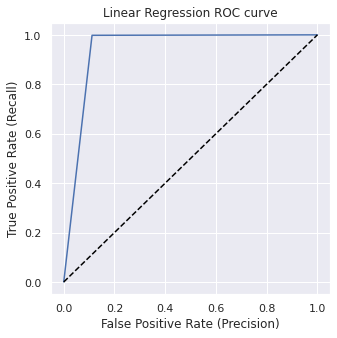

In [251]:
LR_FPR, LR_TPR, _ = roc_curve(y_test, DT_classifier_prob)

plt.figure(figsize=(5,5))
plt.title('Linear Regression ROC curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')

plt.plot(LR_FPR,LR_TPR)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Train Set Confusion Matrix Values 
 [[267349    101]
 [     0 267588]]
Test Set Confusion Matrix Values 
 [[59482  7467]
 [  120 66691]]


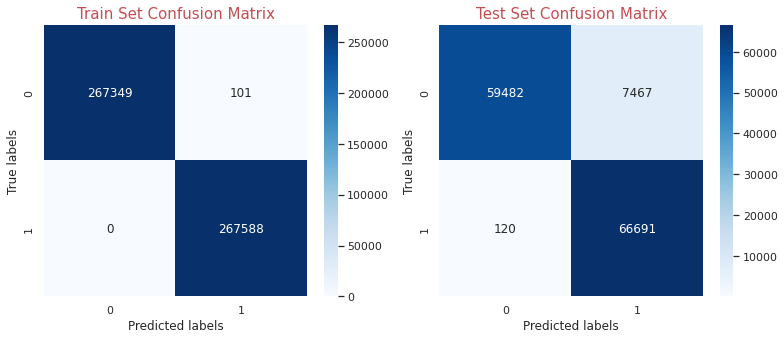

In [252]:
Confusion_matrix(y_train,y_test,y_pred_train,y_pred_test)

In [253]:
from sklearn.tree import plot_tree, export_graphviz
from IPython.display import SVG
from sklearn import tree
from graphviz import Source
from IPython.display import display

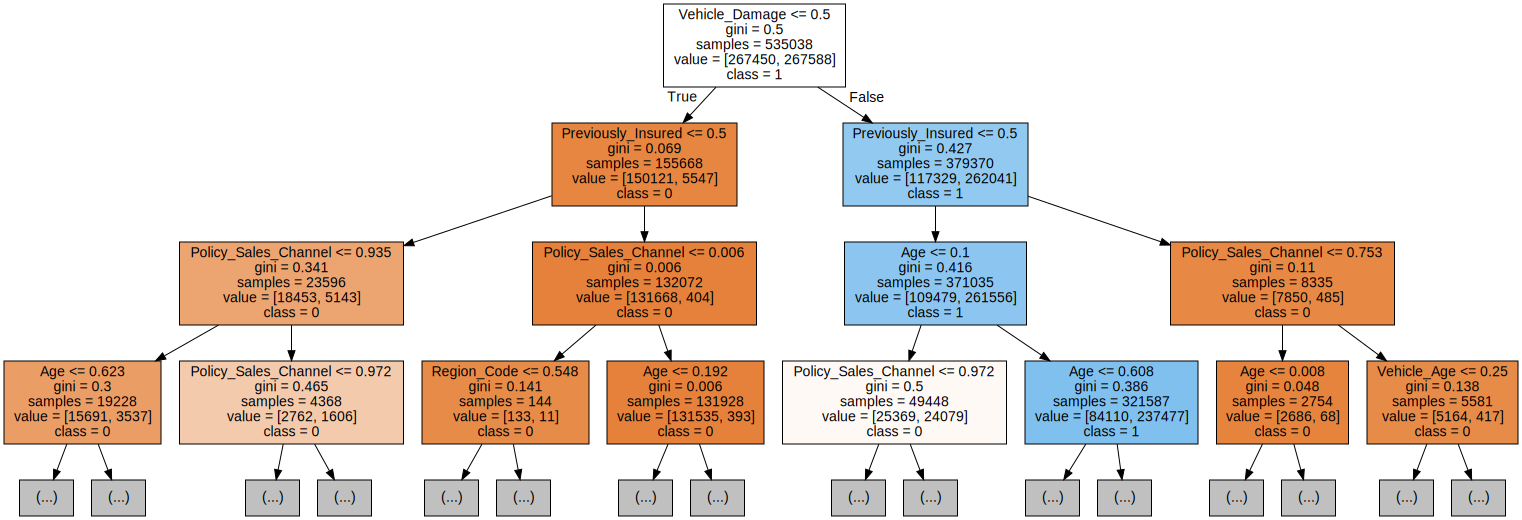

In [254]:
graph = Source(tree.export_graphviz(DT_Classifier, out_file=None
   , feature_names=X.columns, class_names=['0', '1'] 
   , filled = True
   ,max_depth=3))
display(SVG(graph.pipe(format='svg')))

## **Conclusion**

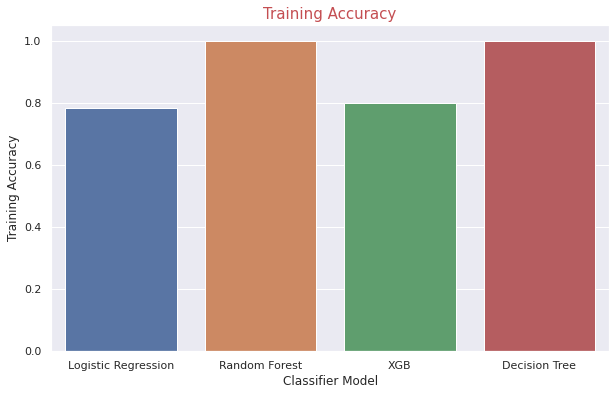

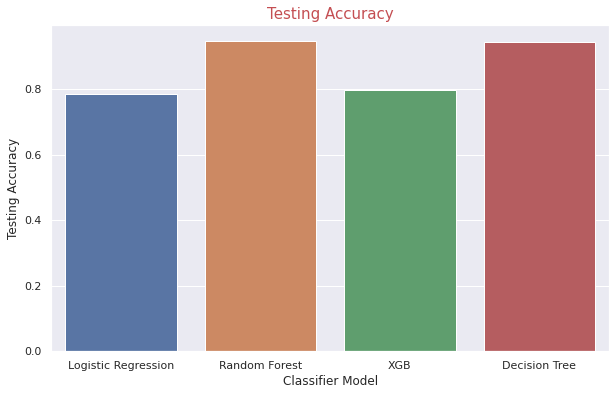

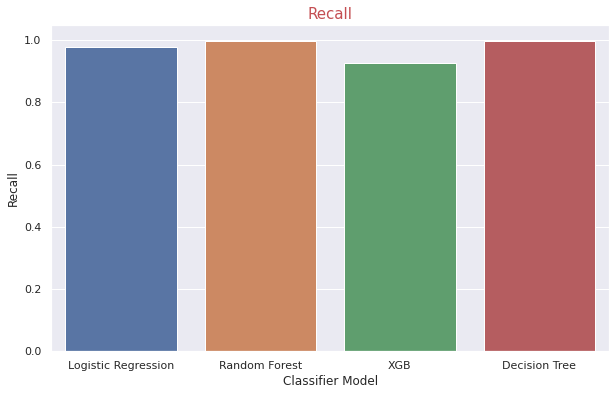

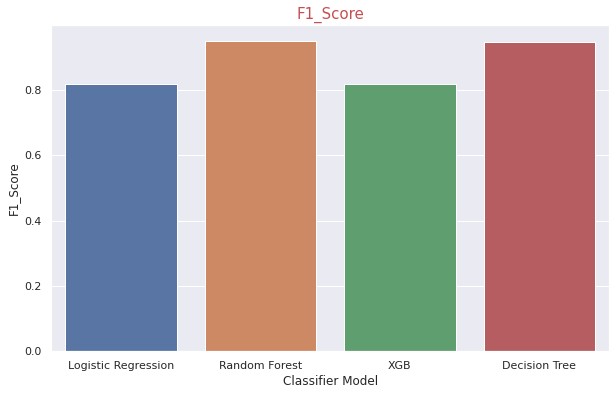

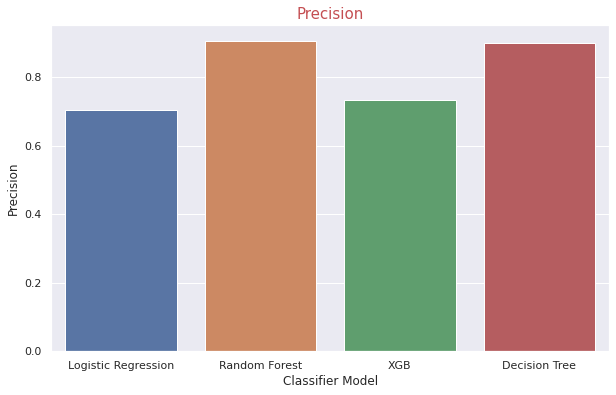

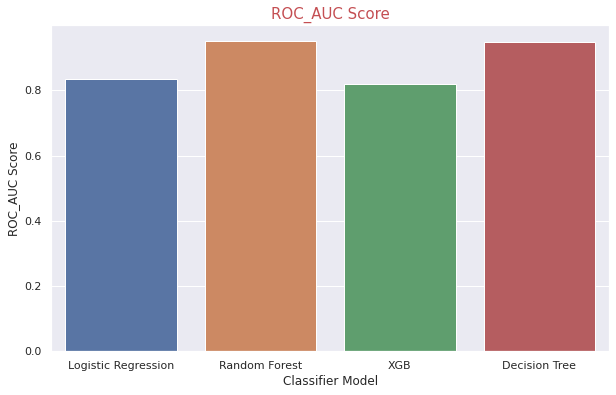

In [255]:
for i in Model_metrics_df.columns[1:]:
    plt.figure(figsize=(10,6))
    sns.barplot(x='Classifier Model', y=i, data=Model_metrics_df)
    plt.title(i,color='r',fontsize=15)
    plt.show()
    print('\n')

In [256]:
Model_metrics_df

,Classifier Model,Training Accuracy,Testing Accuracy,Recall,F1_Score,Precision,ROC_AUC Score
0,Logistic Regression,0.784,0.784,0.977,0.819,0.705,0.833
1,Random Forest,1.000,0.948,0.998,0.950,0.907,0.952
2,XGB,0.798,0.796,0.927,0.819,0.734,0.818
3,Decision Tree,1.000,0.943,0.998,0.946,0.899,0.949


### Decision Tree Classifier and Random Forest Classifier are both showing the impressive results.

###While developing the model we need to consider one most important parameter: **'Model Explainability'**.

###As Decision Tree Classifer is  more explainable, We will prefer Decision Tree Classifier.

* Percentage of customers who didnt have the Vehicle Insurance and show Response as a YES : 22.62
* Gender and Driving License have almost no impact on Target Variable 'Response'.
* Many younsters have already Insured their vehicle. We need to focus more on 30 to 60 Age Group.
* With Proper Marketing we can increase the number of customers who has recently bought the vehicle i.e. less than a year.
* 'Vehicle Damage' makes high positive impact while 'Previously Insured' makes high negative impact on out target variable.
* With Deployment of Decision Tree Classifier, we can more rightly focus on customers who have high chances of purchacing the Vehicle Insurance. 